In [64]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

In [65]:
#import data
credit_data_file = "crx.data"
credit_df = pd.read_csv(credit_data_file)
credit_df.head()
#create new dataframe soon to be filled with values converted to numbers
new_credit_df = pd.DataFrame()

In [66]:
#define functions converting form symbols/strings to integers, floats
def symbol_to_int(attribute, name):
    symbol_list = list()
    int_attribute = list()
    for record in attribute:
        if record not in symbol_list:
            symbol_list.append(record)
        int_attribute.append(symbol_list.index(record))
    new_credit_df[name] = int_attribute
    
def string_to_float(attribute, name):
    float_attribute = list()
    for record in attribute:
        try:
            float_attribute.append(float(record))
        except ValueError:
            float_attribute.append(-1)
    new_credit_df[name] = float_attribute
    
def boolean_to_int(attribute, name):
    int_attribute = list()
    for record in attribute:
        if record == 't' or record == '+':
            int_attribute.append(1)
        elif record == 'f' or record == '-':
            int_attribute.append(0)
        else:
            int_attribute.append(-1)
    new_credit_df[name] = int_attribute

In [67]:
#fill new dataframe with values
symbol_to_int(credit_df.A1, "A1")
string_to_float(credit_df.A2, "A2")
string_to_float(credit_df.A3, "A3")
symbol_to_int(credit_df.A4, "A4")
symbol_to_int(credit_df.A5, "A5")
symbol_to_int(credit_df.A6, "A6")
symbol_to_int(credit_df.A7, "A7")
string_to_float(credit_df.A8, "A8")
boolean_to_int(credit_df.A9, "A9")
boolean_to_int(credit_df.A10, "A10")
string_to_float(credit_df.A11, "A11")
boolean_to_int(credit_df.A12, "A12")
symbol_to_int(credit_df.A13, "A13")
string_to_float(credit_df.A14, "A14")
string_to_float(credit_df.A15, "A15")
boolean_to_int(credit_df.A16, "A16")
credit_df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [68]:
new_credit_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0,30.83,0.000,0,0,0,0,1.25,1,1,1.0,0,0,202.0,0.0,1
1,1,58.67,4.460,0,0,1,1,3.04,1,1,6.0,0,0,43.0,560.0,1
2,1,24.50,0.500,0,0,1,1,1.50,1,0,0.0,0,0,280.0,824.0,1
3,0,27.83,1.540,0,0,0,0,3.75,1,1,5.0,1,0,100.0,3.0,1
4,0,20.17,5.625,0,0,0,0,1.71,1,0,0.0,0,1,120.0,0.0,1


In [69]:
def pairplot(data, vars):
  plot_kws={'alpha': 0.5, 
            'marker': '.'}
  sns.pairplot(data.dropna(),
               hue="A16",
               vars=vars,
               diag_kind="kde",
               size=3, plot_kws=plot_kws);

def print_basic_histogram(data, x_name):
  plt.figure(figsize=(10,6));
  hist_params = {'normed': False, 'bins': 20, 'alpha': 0.4}
  plt.hist(data.dropna());
  plt.ylabel('# count ')
  plt.xlabel(x_name)

In [70]:
def concatenate_attributes(attributes, name):
    cnctnt_attribute = list()
    for index in range(attributes[0].size):
        record = str()
        for attr in attributes:
            record += str(attr[index])
        cnctnt_attribute.append(int(record))
    new_credit_df[name] = cnctnt_attribute

concatenate_attributes([new_credit_df.A9, new_credit_df.A10, new_credit_df.A12], "A9_A10_A12")
new_credit_df.A9_A10_A12.unique()

array([110, 100, 111, 101,   1,   0,  10,  11])

In [71]:
new_credit_df.groupby(["A9", "A10", "A12"])["A16"].aggregate(["count", "mean"])

count      mean
A9 A10 A12                 
0  0   0      156  0.076923
       1      106  0.084906
   1   0       38  0.052632
       1       29  0.000000
1  0   0       61  0.606557
       1       72  0.555556
   1   0      119  0.924370
       1      109  0.889908

Jak widać, A9 ma duży wpływ na wartość A16. Co więcej wydaje się, że wartość 't' w A10 także powinna zwiększać szanse na akceptację kredytu. Widać to przede wszystkim wtedy, gdy A9 ma także wartośc 't', ale nie da się potwierdzić tej teorii ze względu na małą próbkę rekordów, gdy A9 i A10 przyjmują, odpowiednio, 'f' i 't'.

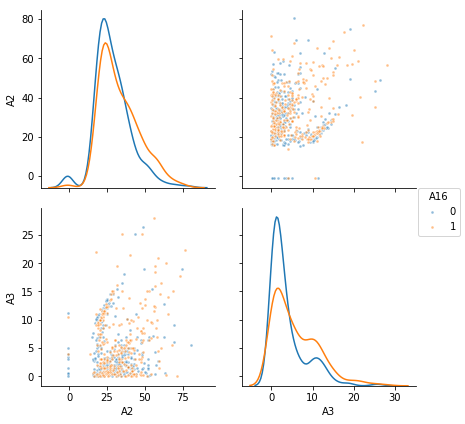

In [72]:
pairplot(new_credit_df, ["A2","A3"])

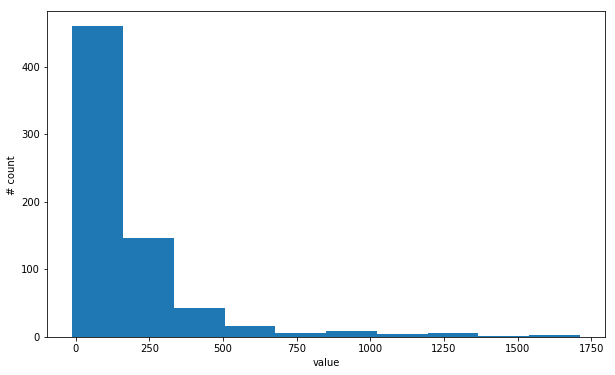

In [74]:
new_credit_df["mult_A2_A3"] = new_credit_df.A2 * new_credit_df.A3
print_basic_histogram(new_credit_df["mult_A2_A3"], "value")

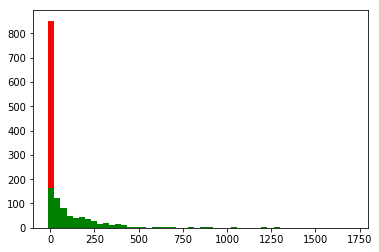

In [88]:
def print_histogram(data, colored_data):
    colors = ['green', 'red']
    bins = 50
    #hist_params = {'histtype': 'bar', 'color': colors, 'stacked': True, 'fill':True, 'bins':20}
    plt.hist([data, colored_data], bins, histtype='bar', color=colors, stacked=True, fill=True)
    plt.show()
              
print_histogram(new_credit_df.mult_A2_A3, new_credit_df.A16)


Już z tego histogramu można zauważyć, że wysokie wartości wynikające z pomnożenia A2 i A3 skutkują akceptacją wniosku o kredyt. Spróbujmy znaleźć wartośc graniczną.

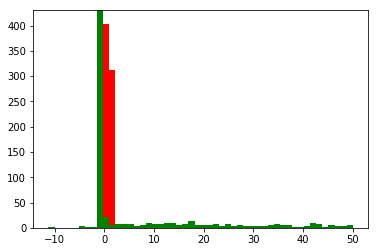

In [90]:
def is_less_than_50(record):
    if record > 50:
        return -1
    else:
        return record
new_credit_df["mult_A2_A3_filtered"] = new_credit_df.mult_A2_A3.apply(is_less_than_50)
print_histogram(new_credit_df.mult_A2_A3_filtered, new_credit_df.A16)

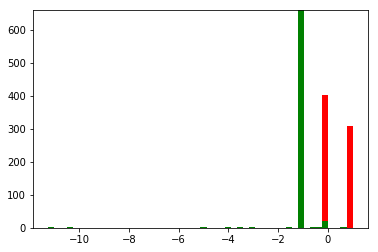

In [95]:
def is_less_than_1(record):
    if record > 1:
        return -1
    else:
        return record
new_credit_df["mult_A2_A3_filtered_2"] = new_credit_df.mult_A2_A3.apply(is_less_than_1)
print_histogram(new_credit_df.mult_A2_A3_filtered_2, new_credit_df.A16)

Jak widać jeżeli wartośc wynikająca z przemnożenia A2 i A3 jest większa od około 1 to mamy niemal pewność, że wniosek zostanie zaakceptowany.